<a href="https://colab.research.google.com/github/carloshnp/PS-2025.1/blob/main/PS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np


In [4]:
df = pd.read_csv("campeonatos_futebol_atualizacao.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

In [6]:
df

,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,Cartões amarelos 1,Cartões amarelos 2,Cartões vermelhos 1,Cartões vermelhos 2,Cruzamentos 1,Cruzamentos 2,Laterais 1,Laterais 2,Chutes bloqueados 1,Chutes bloqueados 2,Contra-ataques 1,Contra-ataques 2,Gols 1,Gols 2,Tiro de meta 1,Tiro de meta 2,Tratamentos 1,Tratamentos 2,Substituições 1,Substituições 2,Tiros-livres 1,Tiros-livres 2,Defesas difíceis 1,Defesas difíceis 2,Posse 1(%),Posse 2(%),Time 1,Time 2,Position 1,Position 2
0,8.0,0.0,6.0,3.0,7.0,1.0,6.0,1.0,8.0,14.0,0.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,77.0,23.0,Glasgow Rangers,Livingston,4-3-3,4-3-3
1,0.0,2.0,0.0,2.0,0.0,4.0,3.0,4.0,19.0,14.0,4.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,44.0,56.0,Ross County,St.Johnstone,3-5-2,3-5-2
2,4.0,5.0,1.0,5.0,8.0,11.0,2.0,5.0,13.0,14.0,2.0,2.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,47.0,53.0,Dundee FC,St. Mirren,4-3-3,3-4-1-2
3,4.0,7.0,8.0,1.0,6.0,5.0,4.0,7.0,4.0,11.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,27.0,73.0,Hearts,Celtic,3-4-3,4-2-3-1
4,3.0,1.0,1.0,3.0,5.0,4.0,2.0,2.0,12.0,17.0,1.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,58.0,42.0,Aberdeen,Dundee U.,4-4-2,3-5-1-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27711,6.0,2.0,1.0,0.0,9.0,6.0,6.0,5.0,7.0,7.0,2.0,1.0,0.0,0.0,29.0,7.0,15.0,14.0,4.0,0.0,1.0,3.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,48.0,Aston Villa,Blackburn,4-4-2,4-5-1
27712,6.0,0.0,4.0,3.0,4.0,2.0,8.0,2.0,11.0,9.0,2.0,2.0,0.0,0.0,7.0,4.0,18.0,9.0,3.0,1.0,NaN,NaN,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,48.0,Arsenal,Fulham,4-2-3-1,4-4-2
27713,7.0,7.0,2.0,3.0,10.0,2.0,8.0,0.0,10.0,6.0,2.0,0.0,0.0,0.0,17.0,8.0,14.0,14.0,7.0,0.0,NaN,NaN,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,45.0,Manchester Utd,Stoke,4-4-2,4-4-2
27714,6.0,6.0,1.0,2.0,4.0,3.0,4.0,6.0,5.0,3.0,2.0,0.0,0.0,0.0,5.0,13.0,9.0,3.0,1.0,2.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,55.0,West Ham,Manchester City,4-5-1,4-4-2


In [7]:
df['Time Vencedor'] = np.where(df['Gols 1'] > df['Gols 2'], df['Time 1'], np.where(df['Gols 1'] < df['Gols 2'], df['Time 2'], 'Empate'))

In [8]:
def encontraForm(formacoes,form):
  for i in range(30):
    if(formacoes[i] == form):
      return i
  return -1

In [9]:
formacoes = df['Position 1'].unique()
pos1 = 38
pos2 = 39
gols1 = 22
gols2 = 23

#matriz com um indice de quanto a formacao domina a outra
correlacao = np.full((30, 30), 0)

#matriz com a quantidade de vezes que o confronto foi jogado
#(partidas que so mudam qual formacao esta em casa ou fora sao contadas como partidas diferentes)
correlacao_qntd = np.full((30, 30), 0)

for i in range(len(df)):
    form1 = df.iloc[i, pos1]
    form2 = df.iloc[i, pos2]
    indice1 = encontraForm(formacoes, form1)
    indice2 = encontraForm(formacoes, form2)

    if indice1 == -1 or indice2 == -1:
        continue


    if df.iloc[i, gols1] > df.iloc[i, gols2]:
        correlacao[indice1, indice2] += 1
        correlacao_qntd[indice1, indice2] += 1
    elif df.iloc[i, gols1] < df.iloc[i, gols2]:
        correlacao[indice1, indice2] -= 1
        correlacao_qntd[indice1, indice2] += 1

resultado = np.divide(correlacao, correlacao_qntd, out=np.zeros_like(correlacao, dtype=float), where=correlacao_qntd != 0)


In [10]:
par_qntd = 30
par_taxa = 0.5
for i in range(30):
  for j in range(30):
    #parametros para detectar se uma formacao tem mt vantagem sobre outra
    if ((correlacao_qntd[i,j] > par_qntd) & (resultado[i,j] > par_taxa)):
      #printa os indices das formacoes no array, quais as formacoes, saldo de vitorias e qnt de partidas jogadas
      print(i,j)
      print(formacoes[i],formacoes[j])
      print(correlacao[i,j])
      print(correlacao_qntd[i,j])
      print("\n")

0 7
4-3-3 4-5-1
49
87


0 9
4-3-3 5-3-2
50
66


0 12
4-3-3 5-4-1
39
49


0 18
4-3-3 4-1-4-1
60
104


6 7
4-2-3-1 4-5-1
61
83


6 9
4-2-3-1 5-3-2
42
82


6 13
4-2-3-1 4-3-2-1
27
53


10 1
3-4-1-2 3-5-2
17
33




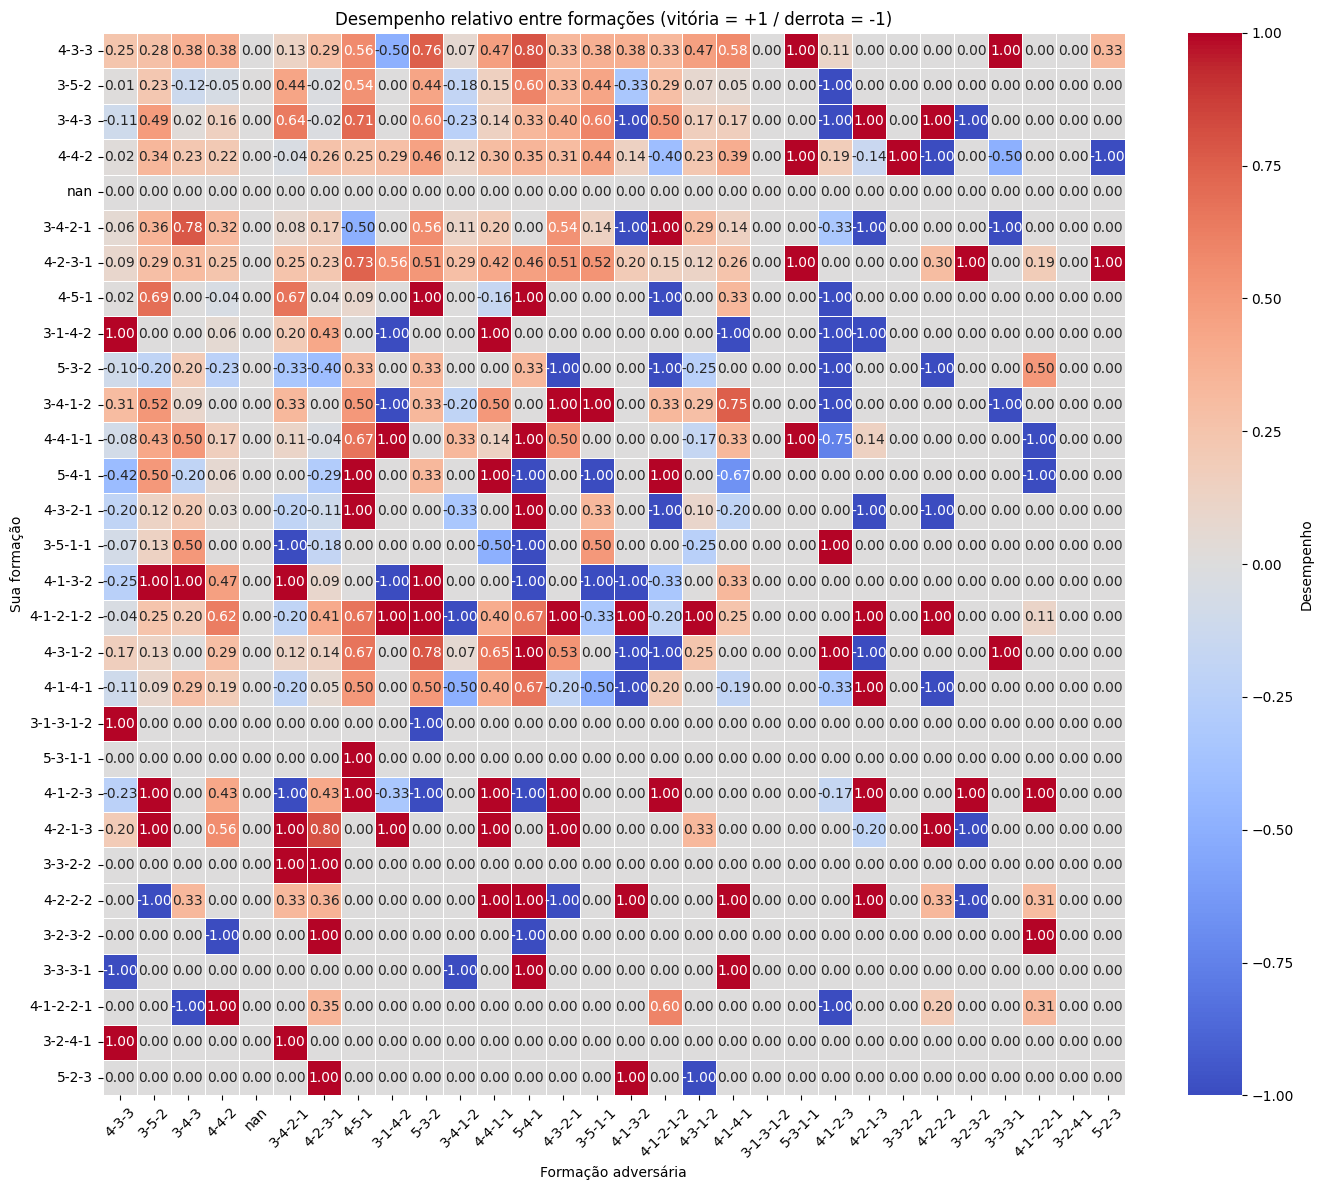

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cria a figura
plt.figure(figsize=(14, 12))

# Cria o heatmap
sns.heatmap(
    resultado,                      # sua matriz final
    xticklabels=formacoes,         # nomes das colunas
    yticklabels=formacoes,         # nomes das linhas
    cmap="coolwarm",               # cores (pode testar outros: "viridis", "plasma", etc.)
    annot=True,                    # mostra os valores dentro das células
    fmt=".2f",                     # formatação dos números
    linewidths=0.5,                # linhas entre células
    cbar_kws={'label': 'Desempenho'}  # legenda da barra de cor
)

plt.xlabel("Formação adversária")
plt.ylabel("Sua formação")
plt.title("Desempenho relativo entre formações (vitória = +1 / derrota = -1)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

O que nos mostra que salvo raros casos, uma formação não possui vantagem significativa sobre outras, e a principal vantagem tem respeito a jogar em casa ou fora.

## ------------------------------------------ Matriz de Correlacao ---------------

In [12]:
df_new = df.iloc[:,:-5]

#gera a matriz de correlacao
corr_matrix = df_new.corr(method='pearson').round(2)

<Axes: >

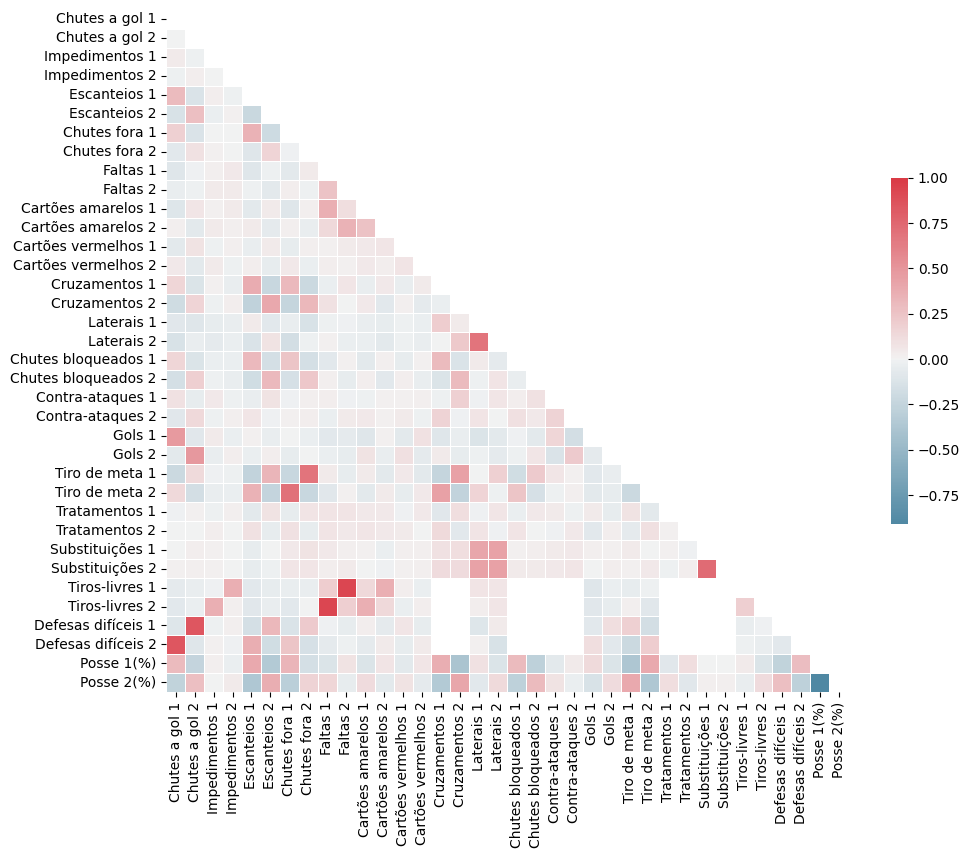

In [13]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [14]:
#printa as variaveis que tem correlacao maior que 0.5 ou menor que -0.5
for row in range(len(corr_matrix)):
  for col in range(len(corr_matrix.columns)):
    if (row == col):
      continue
    if (corr_matrix.iloc[row,col] > 0.5):
      print(corr_matrix.columns[row],corr_matrix.columns[col])
      print(corr_matrix.iloc[row,col])
      print("\n")
    if (corr_matrix.iloc[row,col] < -0.5):
      print(corr_matrix.columns[row],corr_matrix.columns[col])
      print(corr_matrix.iloc[row,col])
      print("\n")

Chutes a gol 1 Defesas difíceis 2
0.85


Chutes a gol 2 Defesas difíceis 1
0.85


Chutes fora 1 Tiro de meta 2
0.7


Chutes fora 2 Tiro de meta 1
0.68


Faltas 1 Tiros-livres 2
0.93


Faltas 2 Tiros-livres 1
0.93


Laterais 1 Laterais 2
0.68


Laterais 2 Laterais 1
0.68


Tiro de meta 1 Chutes fora 2
0.68


Tiro de meta 2 Chutes fora 1
0.7


Substituições 1 Substituições 2
0.73


Substituições 2 Substituições 1
0.73


Tiros-livres 1 Faltas 2
0.93


Tiros-livres 2 Faltas 1
0.93


Defesas difíceis 1 Chutes a gol 2
0.85


Defesas difíceis 2 Chutes a gol 1
0.85


Posse 1(%) Posse 2(%)
-0.91


Posse 2(%) Posse 1(%)
-0.91




 Usando 0.5 como corte, podemos analisar variaveis fortemente correlacionadas, que possivelmente indicam o mesmo evento (por exemplo, uma falta cometida pelo time 1 sempre ocasiona um tiro-livre para o time 2, salvo excessoes como penaltis) ou tem uma correlacao tao forte que podem ser analisadas como uma unica variavel

--------------------------------------------------------------------------------

In [40]:
times_df = pd.DataFrame(df['Time 1'].unique(), columns=['Time'])

#310 times unicos no total
times_casa = df['Time 1'].unique()
times_fora = df['Time 2'].unique()

times_df = times_df.sort_values(by=['Time'])
times_df = times_df.reset_index(drop=True)


In [41]:
for i in range(len(times_casa)):
  if(times_casa[i] not in times_fora):
    print(times_casa[i])
#Mostra que todo time tem pelo menos um jogo em casa e fora

In [131]:
#Implementando o dataframe com dados especificos de cada time com base no df original
times_df['Partidas Casa'] = times_df['Time'].map(df['Time 1'].value_counts())
times_df['Partidas Fora'] = times_df['Time'].map(df['Time 2'].value_counts())
times_df['Partidas'] = times_df['Partidas Casa'] + times_df['Partidas Fora']

vitorias_casa = df[df['Time Vencedor'] == df['Time 1']]['Time 1'].value_counts()
times_df['Vitorias Casa'] = times_df['Time'].map(vitorias_casa).fillna(0).astype(int)
vitorias_fora = df[df['Time Vencedor'] == df['Time 2']]['Time 2'].value_counts()
times_df['Vitorias Fora'] = times_df['Time'].map(vitorias_fora).fillna(0).astype(int)

times_df['Vitorias %'] = ((times_df['Vitorias Casa'] + times_df['Vitorias Fora']) / (times_df['Partidas'])).round(2)
times_df['Vitorias Casa %'] = ((times_df['Vitorias Casa']) / (times_df['Partidas Casa'])).round(2)
times_df['Vitorias Fora %'] = ((times_df['Vitorias Fora']) / (times_df['Partidas Fora'])).round(2)

empates_casa = df[df['Time Vencedor'] == 'Empate']['Time 1'].value_counts()
times_df['Empates Casa'] = times_df['Time'].map(empates_casa).fillna(0).astype(int)
empates_fora = df[df['Time Vencedor'] == 'Empate']['Time 2'].value_counts()
times_df['Empates Fora'] = times_df['Time'].map(empates_fora).fillna(0).astype(int)
times_df['Empates %'] = ((times_df['Empates Casa'] + times_df['Empates Fora']) / (times_df['Partidas'])).round(2)

times_df['Gols'] = times_df['Time'].map(df.groupby('Time 1')['Gols 1'].sum() + df.groupby('Time 2')['Gols 2'].sum())
times_df['Gols Casa'] = times_df['Time'].map(df.groupby('Time 1')['Gols 1'].sum())
times_df['Gols Fora'] = times_df['Time'].map(df.groupby('Time 2')['Gols 2'].sum())
times_df['Gols por Partida'] = (times_df['Gols'] / (times_df['Partidas'])).round(2)

times_df['Gols Sofridos'] = times_df['Time'].map(df.groupby('Time 1')['Gols 2'].sum() + df.groupby('Time 2')['Gols 1'].sum())
times_df['Gols Sofridos Casa'] = times_df['Time'].map(df.groupby('Time 1')['Gols 2'].sum())
times_df['Gols Sofridos Fora'] = times_df['Time'].map(df.groupby('Time 2')['Gols 1'].sum())
times_df['Gols Sofridos por Partida'] = (times_df['Gols Sofridos'] / (times_df['Partidas'])).round(2)

times_df['Saldo de Gols'] = times_df['Gols'] - times_df['Gols Sofridos']

times_df['Chutes a Gol'] = times_df['Time'].map(df.groupby('Time 1')['Chutes a gol 1'].sum() + df.groupby('Time 2')['Chutes a gol 2'].sum())
times_df['Chutes Fora'] = times_df['Time'].map(df.groupby('Time 1')['Chutes fora 1'].sum() + df.groupby('Time 2')['Chutes fora 2'].sum())
times_df['Chutes a Gol Contra'] = times_df['Time'].map(df.groupby('Time 1')['Chutes a gol 2'].sum() + df.groupby('Time 2')['Chutes a gol 1'].sum())
times_df['Chutes Fora Contra'] = times_df['Time'].map(df.groupby('Time 1')['Chutes fora 2'].sum() + df.groupby('Time 2')['Chutes fora 1'].sum())

times_df['Cartões Vermelhos'] = times_df['Time'].map(df.groupby('Time 1')['Cartões vermelhos 1'].sum() + df.groupby('Time 2')['Cartões vermelhos 2'].sum())
times_df['Cartões Vermelhos por Partida'] = (times_df['Cartões Vermelhos'] / (times_df['Partidas'])).round(2)

times_df['Eficiencia de Ataque'] = times_df['Gols']/(times_df['Chutes a Gol'] + times_df['Chutes Fora'])
times_df['Eficiencia de Defesa'] = times_df['Gols Sofridos']/(times_df['Chutes a Gol Contra'] + times_df['Chutes Fora Contra'])

times_df['Posse de Bola Media'] = times_df['Time'].map((df.groupby('Time 1')['Posse 1(%)'].mean() + df.groupby('Time 2')['Posse 2(%)'].mean()) / 2).round(2)
times_df['Posse de Bola Casa'] = times_df['Time'].map(df.groupby('Time 1')['Posse 1(%)'].mean()).round(2)
times_df['Posse de Bola Fora'] = times_df['Time'].map(df.groupby('Time 2')['Posse 2(%)'].mean()).round(2)

times_df['Formacao Mais Usada Casa'] = times_df['Time'].map(df.groupby('Time 1')['Position 1'].agg(pd.Series.mode))
times_df['Formacao Mais Usada Fora'] = times_df['Time'].map(df.groupby('Time 2')['Position 2'].agg(pd.Series.mode))



In [132]:
times_df

,Time,Partidas Casa,Partidas Fora,Partidas,Vitorias Casa,Vitorias Fora,Vitorias %,Vitorias Casa %,Vitorias Fora %,Empates Casa,Empates Fora,Empates %,Gols,Gols Casa,Gols Fora,Gols por Partida,Gols Sofridos,Gols Sofridos Casa,Gols Sofridos Fora,Gols Sofridos por Partida,Saldo de Gols,Chutes a Gol,Chutes Fora,Chutes a Gol Contra,Chutes Fora Contra,Eficiencia de Ataque,Posse de Bola Media,Posse de Bola Casa,Posse de Bola Fora,Formacao Mais Usada Casa,Formacao Mais Usada Fora,Liga,Eficiencia de Defesa,Cartões Vermelhos,Cartões Vermelhos por Partida
0,AEK Atenas,38,38,76,28,20,0.63,0.74,0.53,4,12,0.21,127.0,73.0,54.0,1.67,49.0,19.0,30.0,0.64,78.0,431.0,396.0,208.0,232.0,0.153567,57.07,58.37,55.76,4-2-3-1,4-2-3-1,Grego,0.111364,5.0,0.07
1,AZ,23,22,45,17,12,0.64,0.74,0.55,3,2,0.11,91.0,56.0,35.0,2.02,41.0,18.0,23.0,0.91,50.0,230.0,211.0,136.0,182.0,0.206349,59.13,63.73,54.52,4-3-3,4-3-3,Holandes,0.128931,2.0,0.04
2,Aalesund,60,59,119,20,12,0.27,0.33,0.20,15,9,0.20,153.0,91.0,62.0,1.29,241.0,103.0,138.0,2.03,-88.0,453.0,692.0,657.0,848.0,0.133624,47.65,49.98,45.32,4-4-2,4-4-2,Noruegues,0.160133,1.0,0.01
3,Aberdeen,102,101,203,57,51,0.53,0.56,0.50,20,16,0.18,315.0,166.0,149.0,1.55,225.0,107.0,118.0,1.11,90.0,858.0,986.0,701.0,748.0,0.170824,51.76,52.38,51.14,4-2-3-1,4-2-3-1,Escoces,0.155280,11.0,0.05
4,Adanaspor,16,17,33,3,2,0.15,0.19,0.12,3,4,0.21,30.0,17.0,13.0,0.91,62.0,32.0,30.0,1.88,-32.0,66.0,81.0,114.0,89.0,0.204082,47.54,48.89,46.18,4-2-3-1,4-2-3-1,Turco,0.305419,2.0,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,Yeni Malatyaspor,81,82,163,28,17,0.28,0.35,0.21,24,21,0.28,196.0,117.0,79.0,1.20,234.0,110.0,124.0,1.44,-38.0,604.0,769.0,735.0,847.0,0.142753,46.29,48.05,44.54,4-2-3-1,4-2-3-1,Turco,0.147914,14.0,0.09
306,Yokohama F.Marinos,87,87,174,48,41,0.51,0.55,0.47,18,11,0.17,320.0,183.0,137.0,1.84,224.0,101.0,123.0,1.29,96.0,968.0,1152.0,733.0,980.0,0.150943,56.62,56.70,56.54,4-3-3,4-2-3-1,Japones,0.130765,5.0,0.03
307,Yokohama FC,36,36,72,10,5,0.21,0.28,0.14,8,7,0.21,70.0,43.0,27.0,0.97,137.0,63.0,74.0,1.90,-67.0,243.0,431.0,346.0,593.0,0.103858,48.56,48.47,48.64,3-4-2-1,4-4-2,Japones,0.145900,2.0,0.03
308,Zaragoza,76,76,152,29,14,0.28,0.38,0.18,17,17,0.22,159.0,95.0,64.0,1.05,240.0,101.0,139.0,1.58,-81.0,425.0,561.0,573.0,575.0,0.161258,45.16,46.35,43.98,4-2-3-1,4-2-3-1,Espanhol,0.209059,15.0,0.10


Analisando o dataset original é possivel notar quando o campeonato de que as partidas foram retiradas muda, e permanece assim até trocar para o próximo.Assim é possível criar um código que ajude a analisar qual time pertence a qual liga.

Isso é extremamente benéfico para a análise pois um time pode ter um desempenho fenomenal em uma liga mais fraca, fazendo com que tenham índices melhores do que de equipes que são excelentes em ligas fortes, já que seus adversários são melhores no geral, assim enviesando o modelo.

In [111]:

#Codigo que me permite ter uma ideia geral de quando o dataset muda de campeonato
#Tirar os comentarios caso queira entender um pouco
lista_times = []
cont = 0
for row in range(len(df)):
  if ((df.iloc[row,36] not in lista_times) or (df.iloc[row,37] not in lista_times)):
    lista_times.append(df.iloc[row,36])
    lista_times.append(df.iloc[row,37])
    #print(df.iloc[row,36])
    #print(df.iloc[row,37])
    #print(row)
    cont = cont + 1
    continue
  #if (cont > 5):
    #print("MUDOU DE CAMPEONATO\n")
  cont = 0



Fazendo uma analise manual com auxilio do trecho de codigo podemos perceber que os campeonatos estao distribuidos assim

0 - 1216 campeonato escoces

1217 - 2819 campeonato japones

2820 - 4497 campeonato noruegues

4498 - 5093 campeonato grego

5094 -  9866 campeonato italiano

9867 - 13517 campeonato turco

13518 - 13688 campeonato alemao

13689 - 17964 campeonato frances

17965 - 22543 campeonato espanhol

22544 - 22953 campeonato holandes

22954 - 27715 campeonato ingles

In [45]:
#Mapeando os times por ligas
prim_aparicao = []
for i in range(len(times_df)):
  prim_aparicao.append(df[df['Time 1'] == times_df.iloc[i,0]].index[0])

liga_time = []
ligas = {
    0 : 'Escoces',
    1 : 'Japones',
    2 : 'Noruegues',
    3 : 'Grego',
    4 : 'Italiano',
    5 : 'Turco',
    6 : 'Alemao',
    7 : 'Frances',
    8 : 'Espanhol',
    9 : 'Holandes',
    10 : 'Ingles'
}
for i in range(len(prim_aparicao)):
  if(prim_aparicao[i] <= 1216):
    liga_time.append(ligas[0])
  elif(prim_aparicao[i] <= 2819):
    liga_time.append(ligas[1])
  elif(prim_aparicao[i] <= 4497):
    liga_time.append(ligas[2])
  elif(prim_aparicao[i] <= 5093):
    liga_time.append(ligas[3])
  elif(prim_aparicao[i] <= 9866):
    liga_time.append(ligas[4])
  elif(prim_aparicao[i] <= 13517):
    liga_time.append(ligas[5])
  elif(prim_aparicao[i] <= 13688):
    liga_time.append(ligas[6])
  elif(prim_aparicao[i] <= 17964):
    liga_time.append(ligas[7])
  elif(prim_aparicao[i] <= 22543):
    liga_time.append(ligas[8])
  elif(prim_aparicao[i] <= 22953):
    liga_time.append(ligas[9])
  elif(prim_aparicao[i] <= 27715):
    liga_time.append(ligas[10])

times_df['Liga'] = liga_time


In [148]:
times_df

,Time,Partidas Casa,Partidas Fora,Partidas,Vitorias Casa,Vitorias Fora,Vitorias %,Vitorias Casa %,Vitorias Fora %,Empates Casa,Empates Fora,Empates %,Gols,Gols Casa,Gols Fora,Gols por Partida,Gols Sofridos,Gols Sofridos Casa,Gols Sofridos Fora,Gols Sofridos por Partida,Saldo de Gols,Chutes a Gol,Chutes Fora,Chutes a Gol Contra,Chutes Fora Contra,Eficiencia de Ataque,Posse de Bola Media,Posse de Bola Casa,Posse de Bola Fora,Formacao Mais Usada Casa,Formacao Mais Usada Fora,Liga,Eficiencia de Defesa,Cartões Vermelhos,Cartões Vermelhos por Partida
0,AEK Atenas,38,38,76,28,20,0.63,0.74,0.53,4,12,0.21,127.0,73.0,54.0,1.67,49.0,19.0,30.0,0.64,78.0,431.0,396.0,208.0,232.0,0.153567,57.07,58.37,55.76,4-2-3-1,4-2-3-1,Grego,0.111364,5.0,0.07
1,AZ,23,22,45,17,12,0.64,0.74,0.55,3,2,0.11,91.0,56.0,35.0,2.02,41.0,18.0,23.0,0.91,50.0,230.0,211.0,136.0,182.0,0.206349,59.13,63.73,54.52,4-3-3,4-3-3,Holandes,0.128931,2.0,0.04
2,Aalesund,60,59,119,20,12,0.27,0.33,0.20,15,9,0.20,153.0,91.0,62.0,1.29,241.0,103.0,138.0,2.03,-88.0,453.0,692.0,657.0,848.0,0.133624,47.65,49.98,45.32,4-4-2,4-4-2,Noruegues,0.160133,1.0,0.01
3,Aberdeen,102,101,203,57,51,0.53,0.56,0.50,20,16,0.18,315.0,166.0,149.0,1.55,225.0,107.0,118.0,1.11,90.0,858.0,986.0,701.0,748.0,0.170824,51.76,52.38,51.14,4-2-3-1,4-2-3-1,Escoces,0.155280,11.0,0.05
4,Adanaspor,16,17,33,3,2,0.15,0.19,0.12,3,4,0.21,30.0,17.0,13.0,0.91,62.0,32.0,30.0,1.88,-32.0,66.0,81.0,114.0,89.0,0.204082,47.54,48.89,46.18,4-2-3-1,4-2-3-1,Turco,0.305419,2.0,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,Yeni Malatyaspor,81,82,163,28,17,0.28,0.35,0.21,24,21,0.28,196.0,117.0,79.0,1.20,234.0,110.0,124.0,1.44,-38.0,604.0,769.0,735.0,847.0,0.142753,46.29,48.05,44.54,4-2-3-1,4-2-3-1,Turco,0.147914,14.0,0.09
306,Yokohama F.Marinos,87,87,174,48,41,0.51,0.55,0.47,18,11,0.17,320.0,183.0,137.0,1.84,224.0,101.0,123.0,1.29,96.0,968.0,1152.0,733.0,980.0,0.150943,56.62,56.70,56.54,4-3-3,4-2-3-1,Japones,0.130765,5.0,0.03
307,Yokohama FC,36,36,72,10,5,0.21,0.28,0.14,8,7,0.21,70.0,43.0,27.0,0.97,137.0,63.0,74.0,1.90,-67.0,243.0,431.0,346.0,593.0,0.103858,48.56,48.47,48.64,3-4-2-1,4-4-2,Japones,0.145900,2.0,0.03
308,Zaragoza,76,76,152,29,14,0.28,0.38,0.18,17,17,0.22,159.0,95.0,64.0,1.05,240.0,101.0,139.0,1.58,-81.0,425.0,561.0,573.0,575.0,0.161258,45.16,46.35,43.98,4-2-3-1,4-2-3-1,Espanhol,0.209059,15.0,0.10


Baseado na pesquisa feita pela Opta Sports (https://theanalyst.com/2024/10/strongest-leagues-world-football-opta-power-rankings) podemos dividir essas ligas arbitrariamente por um 'nivel' que ela está

Nivel 0 - Ingles, Italiano, Alemao, Espanhol, Frances

Nivel 1 - Holandes, Turco , Japones

Nivel 2 - Escoces,Noruegues, Grego



------------------------------------------------------------------------------------------------------------

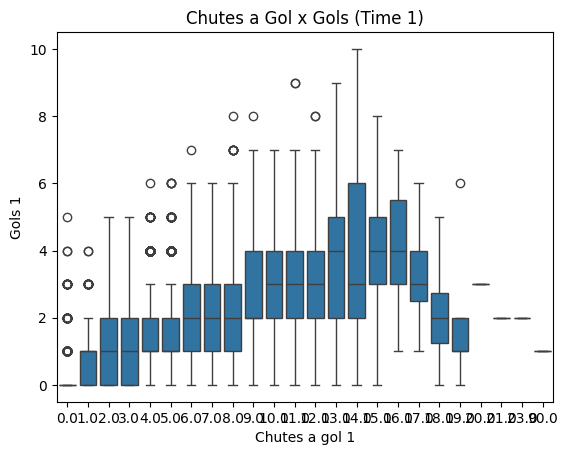

In [23]:
sns.boxplot(x='Chutes a gol 1', y='Gols 1', data=df)
plt.title('Chutes a Gol x Gols (Time 1)')
plt.show()

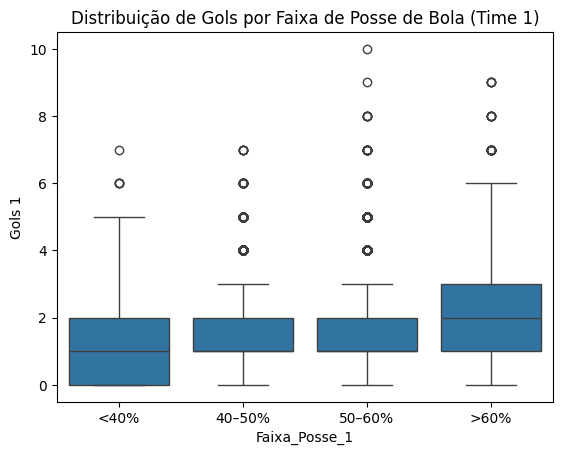

In [24]:
df['Faixa_Posse_1'] = pd.cut(df['Posse 1(%)'], bins=[0, 40, 50, 60, 100], labels=['<40%', '40–50%', '50–60%', '>60%'])

sns.boxplot(x='Faixa_Posse_1', y='Gols 1', data=df)
plt.title('Distribuição de Gols por Faixa de Posse de Bola (Time 1)')
plt.show()

Nos mostra que a partir de 60% de posse de bola para o time da casa, na maioria dos jogos isso implica em 2+ gols

Mas com uma posse de bola equiparada o time da casa continua com uma media de gols maior que a do time de fora(grafico abaixo), com 1 a 2 gols em media quando a posse de bola está disputada (-10% de diferenca)

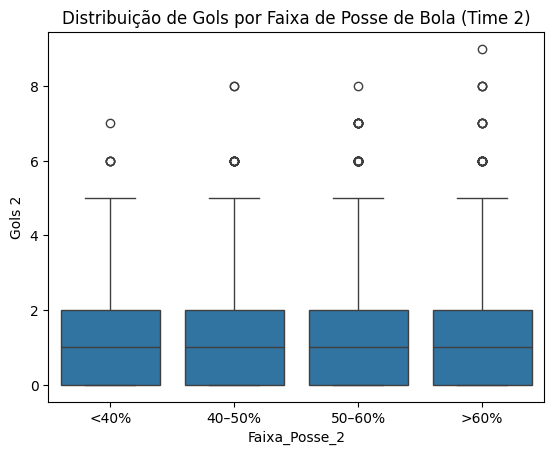

In [25]:
df['Faixa_Posse_2'] = pd.cut(df['Posse 2(%)'], bins=[0, 40, 50, 60, 100], labels=['<40%', '40–50%', '50–60%', '>60%'])

sns.boxplot(x='Faixa_Posse_2', y='Gols 2', data=df)
plt.title('Distribuição de Gols por Faixa de Posse de Bola (Time 2)')
plt.show()

Num geral o time de fora faz menos gols quando comparado ao time da casa com a mesma posse de bola.

Mantendo uma média de 2 gols para menos independente da posse de bola

---------------------------------------------------------------------------------------------------------------------------------------------


#Modelo Prototipo basico usando apenas uma pontuação dada por índices com pesos distintos

In [106]:
def ClassificaLiga(time):
  liga = times_df[times_df['Time'] == time]['Liga'].values[0]
  if liga == 'Ingles' or liga == 'Italiano' or liga == 'Alemao' or liga == 'Espanhol' or liga == 'Frances':
    return 0
  elif liga == 'Holandes' or liga == 'Turco' or liga == 'Japones':
    return 1
  elif liga == 'Escoces' or liga == 'Noruegues' or liga == 'Grego':
    return 2

In [139]:
#MODELO BASICO PARA PONTUAR TIMES
#Funcao que retorna uma pontuação para um time baseado em parametros com peso de importancia
def ScoreTime(time):
  score = ((times_df[times_df['Time'] == time]['Gols por Partida'].values[0] - times_df[times_df['Time'] == time]['Gols Sofridos por Partida'].values[0]) * 1.5 +
           (times_df[times_df['Time'] == time]['Eficiencia de Ataque'].values[0] * 1.2) +
           ((times_df[times_df['Time'] == time]['Vitorias %'].values[0]) /100) * 1 +
           ((times_df[times_df['Time'] == time]['Posse de Bola Media'].values[0]) /100) *0.8 -
           times_df[times_df['Time'] == time]['Eficiencia de Defesa'].values[0] *1.2 -
           times_df[times_df['Time'] == time]['Cartões Vermelhos por Partida'].values[0])

  #Penalidade talvez seja muito severa mas foi a que parece funcionar melhor
  return score - ClassificaLiga(time)

Usando métricas com Gols por Partida, Eficiencias de Ataque e Defesa, porcentagem de vitória, posse de bola média e a liga em que joga podemos fazer uma previsão heurística.

Depois poderemos comparar essa previsão com o resultado de um modelo futuro(Regressao linear, Regressao logística, Random Forest, etc)

In [171]:
def Previsao(time1,time2):
  score1 = ScoreTime(time1)
  score2 = ScoreTime(time2)
  if score1.round(1) == score2.round(1):
    return "Empate"
  elif score1 > score2:
    return time1,score1,score2
  else:
    return time2,score1,score2

In [181]:
print(Previsao("Celtic","Olympiakos"))
print(Previsao("Barcelona", "Real Madrid"))
print(Previsao("Manchester City","Liverpool"))
print(Previsao("Manchester Utd","Tottenham"))
print(Previsao("Tottenham","AEK Atenas"))

('Celtic', np.float64(1.1092963738934993), np.float64(0.5794171763061335))
('Barcelona', np.float64(3.395450658619888), np.float64(2.874956196393484))
('Manchester City', np.float64(2.5198975237443517), np.float64(1.7322413918528705))
('Manchester Utd', np.float64(1.747644035948826), np.float64(1.3662045368865317))
('Tottenham', np.float64(1.3662045368865317), np.float64(-0.011495831592833516))
